<center><h1>Customer Acquisition : Credit Card Business</h1></center>

In [571]:
import warnings
warnings.filterwarnings('ignore')

In [572]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

In [573]:
demo_graph_df = pd.read_csv("Demographic data.csv")
credit_bureau_df = pd.read_csv("Credit Bureau data.csv")

In [574]:
demo_graph_df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [575]:
credit_bureau_df.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [576]:
print(demo_graph_df.shape)
demo_graph_df.info()

(71295, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage

In [577]:
print(credit_bureau_df.shape)
credit_bureau_df.info()

(71295, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null i

## Data Cleaning

Change column name for better readability as well as easier to access.

In [578]:
col = {'Marital Status (at the time of application)' : 'Marital Status',
       'No of months in current residence' : 'Months in Current Residence',
       'No of months in current company' : 'Months in Current Company',
       'Profession ' : 'Profession',
       'Performance Tag' : 'Defaulter'      
      }
demo_graph_df.rename(columns=col, inplace=True)

In [579]:
col = {'No of times 30 DPD or worse in last 6 months' : '30 DPD in 6M',
       'No of times 60 DPD or worse in last 6 months' : '60 DPD in 6M',
       'No of times 90 DPD or worse in last 6 months' : '90 DPD in 6M',
       'No of times 30 DPD or worse in last 12 months' : '30 DPD in 12M',
       'No of times 60 DPD or worse in last 12 months' : '60 DPD in 12M',
       'No of times 90 DPD or worse in last 12 months' : '90 DPD in 12M',
       'Avgas CC Utilization in last 12 months' : 'CC Utilization in 12M',
       'No of trades opened in last 6 months' : 'Trades Opened in 6M',
       'No of trades opened in last 12 months' : 'Trades Opened in 12M',
       'No of PL trades opened in last 6 months' : 'PL Trades Opened in 6M',
       'No of PL trades opened in last 12 months' : 'PL Trades Opened in 12M',
       'No of Inquiries in last 6 months (excluding home & auto loans)' : 'Inquiries in 6M',
       'No of Inquiries in last 12 months (excluding home & auto loans)' : 'Inquiries in 12M',
       'Performance Tag' : 'Defaulter'       
      }
credit_bureau_df.rename(columns=col, inplace=True)

In [580]:
credit_bureau_df.isnull().sum() / credit_bureau_df.index.size * 100

Application ID                0.000000
90 DPD in 6M                  0.000000
60 DPD in 6M                  0.000000
30 DPD in 6M                  0.000000
90 DPD in 12M                 0.000000
60 DPD in 12M                 0.000000
30 DPD in 12M                 0.000000
CC Utilization in 12M         1.483975
Trades Opened in 6M           0.001403
Trades Opened in 12M          0.000000
PL Trades Opened in 6M        0.000000
PL Trades Opened in 12M       0.000000
Inquiries in 6M               0.000000
Inquiries in 12M              0.000000
Presence of open home loan    0.381513
Outstanding Balance           0.381513
Total No of Trades            0.000000
Presence of open auto loan    0.000000
Defaulter                     1.998738
dtype: float64

In [581]:
demo_graph_df.isnull().sum() / demo_graph_df.index.size * 100

Application ID                 0.000000
Age                            0.000000
Gender                         0.002805
Marital Status                 0.008416
No of dependents               0.004208
Income                         0.000000
Education                      0.166912
Profession                     0.019637
Type of residence              0.011221
Months in Current Residence    0.000000
Months in Current Company      0.000000
Defaulter                      1.998738
dtype: float64

**2%** missing values in **Defaulter** which is out target/dependend variable.<BR><BR>
As per problem statement, if **applicant has gone 90 days past due (DPD) or worse in the past 12 months** then that customer is marked as **Defaulter**.<BR>
Using above information we can impute missing target variable vlaues.

In [582]:
credit_bureau_df['Defaulter'] = credit_bureau_df.apply(lambda x : x['Defaulter'] if ~np.isnan(x['Defaulter']) else (1 if x['90 DPD in 12M'] > 0 else 0), axis = 1)
demo_graph_df['Defaulter'] = credit_bureau_df['Defaulter']

In [585]:
credit_bureau_df.isnull().sum()

Application ID                   0
90 DPD in 6M                     0
60 DPD in 6M                     0
30 DPD in 6M                     0
90 DPD in 12M                    0
60 DPD in 12M                    0
30 DPD in 12M                    0
CC Utilization in 12M         1058
Trades Opened in 6M              1
Trades Opened in 12M             0
PL Trades Opened in 6M           0
PL Trades Opened in 12M          0
Inquiries in 6M                  0
Inquiries in 12M                 0
Presence of open home loan     272
Outstanding Balance            272
Total No of Trades               0
Presence of open auto loan       0
Defaulter                        0
dtype: int64

In [587]:
credit_bureau_df[(credit_bureau_df['Outstanding Balance'].isnull()) & (credit_bureau_df['Defaulter'] == 1)]

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
13743,785171954,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
15121,130726109,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
17833,404543089,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
18333,746044170,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
19989,260054189,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
23109,415232032,0,0,0,0,0,0,NaN,0.0,0,0,0,1,2,NaN,NaN,0,0,1.0
24229,117453172,0,0,0,0,0,0,NaN,0.0,0,0,0,0,1,NaN,NaN,0,0,1.0
42673,51310669,0,0,0,0,0,0,NaN,0.0,0,0,0,2,2,NaN,NaN,0,0,1.0


In [588]:
credit_bureau_df[(credit_bureau_df['Outstanding Balance'].isnull())].describe()

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
count,2.720000e+02,272.0,272.0,272.0,272.0,272.0,272.0,0.0,272.0,272.0,272.0,272.0,272.000000,272.000000,0.0,0.0,272.0,272.0,272.000000
mean,4.887308e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.183824,1.224265,NaN,NaN,0.0,0.0,0.029412
std,2.915627e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.503892,0.652330,NaN,NaN,0.0,0.0,0.169269
min,2.147690e+06,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
25%,2.347238e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
50%,5.207258e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
75%,7.371681e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,1.000000,NaN,NaN,0.0,0.0,0.000000
max,9.978773e+08,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.000000,5.000000,NaN,NaN,0.0,0.0,1.000000


**Average credit card utilization** is null menas no credit card issued to that customer so we can replace null with Zero.<BR>
Same case with **Presence of open home loan** & **Outstanding Balance**.

In [589]:
credit_bureau_df = credit_bureau_df.fillna(value=0)

Let's calculate Weight of Evidence & Information Value for both data sets.<BR>
Will use WOE value to replace missing value in demographic dataset.

In [601]:
demo_graph_df[['Age', 'Income', 'Months in Current Residence','Months in Current Company']].describe(percentiles=np.arange(0.1,1,0.1))

,Age,Income,Months in Current Residence,Months in Current Company
count,71295.000000,71295.000000,71295.000000,71295.000000
mean,44.943039,27.195224,34.563420,33.958244
std,9.939211,15.514626,36.759758,20.410824
min,-3.000000,-0.500000,6.000000,3.000000
10%,31.000000,6.000000,6.000000,6.000000
20%,36.000000,11.000000,6.000000,13.000000
30.0%,39.000000,16.000000,6.000000,20.000000
40%,42.000000,21.000000,6.000000,27.000000
50%,45.000000,27.000000,11.000000,34.000000
60%,48.000000,32.000000,29.000000,40.400000


In [643]:
credit_bureau_df.describe(percentiles=np.arange(0.1,1,0.1))

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,PL Trades Opened in 6M,PL Trades Opened in 12M,Inquiries in 6M,Inquiries in 12M,Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Defaulter
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,7.129500e+04,71295.000000,71295.000000,71295.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.256231,2.298015,5.826888,1.206901,2.397447,1.763532,3.535241,0.255446,1.244397e+06,8.186633,0.084620,0.060677
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.532455,2.070194,5.065096,1.352936,2.420086,1.971294,3.582199,0.436114,1.278753e+06,7.090776,0.278318,0.238739
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
10%,9.920720e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.708200e+03,2.000000,0.000000,0.000000
20%,1.990307e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.624600e+04,3.000000,0.000000,0.000000
30.0%,2.984054e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.888392e+05,4.000000,0.000000,0.000000
40%,3.993263e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,3.000000,0.000000,1.000000,1.000000,2.000000,0.000000,5.864684e+05,5.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.734890e+05,6.000000,0.000000,0.000000
60%,5.986019e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,2.000000,6.000000,1.000000,3.000000,2.000000,4.000000,0.000000,9.693564e+05,8.000000,0.000000,0.000000


In [985]:
woe_demo_graph_df = demo_graph_df.copy()
woe_credit_bureau_df = credit_bureau_df.copy()

In [986]:
woe_demo_graph_df['Age'] = pd.qcut(woe_demo_graph_df['Age'], 5, duplicates='drop')
woe_demo_graph_df['Income'] = pd.qcut(woe_demo_graph_df['Income'], 5, duplicates='drop')
woe_demo_graph_df['Months in Current Company'] = pd.qcut(woe_demo_graph_df['Months in Current Company'], 5, duplicates='drop')
woe_demo_graph_df['Months in Current Residence'] = pd.qcut(woe_demo_graph_df['Months in Current Residence'], 5, duplicates='drop')

In [987]:
woe_credit_bureau_df['CC Utilization in 12M'] = pd.qcut(woe_credit_bureau_df['CC Utilization in 12M'], 5, duplicates='drop')
woe_credit_bureau_df['Trades Opened in 6M'] = pd.qcut(woe_credit_bureau_df['Trades Opened in 6M'], 5, duplicates='drop')
woe_credit_bureau_df['Trades Opened in 12M'] = pd.qcut(woe_credit_bureau_df['Trades Opened in 12M'], 5, duplicates='drop')
woe_credit_bureau_df['PL Trades Opened in 12M'] = pd.qcut(woe_credit_bureau_df['PL Trades Opened in 12M'], 5, duplicates='drop')
woe_credit_bureau_df['Inquiries in 6M'] = pd.qcut(woe_credit_bureau_df['Inquiries in 6M'], 5, duplicates='drop')
woe_credit_bureau_df['Inquiries in 12M'] = pd.qcut(woe_credit_bureau_df['Inquiries in 12M'], 5, duplicates='drop')
woe_credit_bureau_df['Outstanding Balance'] = pd.qcut(woe_credit_bureau_df['Outstanding Balance'], 5, duplicates='drop')
woe_credit_bureau_df['Total No of Trades'] = pd.qcut(woe_credit_bureau_df['Total No of Trades'], 5, duplicates='drop')

In [988]:
woe_demo_graph_df.isnull().sum()

Application ID                   0
Age                              0
Gender                           2
Marital Status                   6
No of dependents                 3
Income                           0
Education                      119
Profession                      14
Type of residence                8
Months in Current Residence      0
Months in Current Company        0
Defaulter                        0
dtype: int64

In [989]:
woe_demo_graph_df['Gender'].fillna(value='Missing', inplace=True)
woe_demo_graph_df['Marital Status'].fillna(value='Missing', inplace=True)
woe_demo_graph_df['No of dependents'].fillna(value='Missing', inplace=True)
woe_demo_graph_df['Education'].fillna(value='Missing', inplace=True)
woe_demo_graph_df['Profession'].fillna(value='Missing', inplace=True)
woe_demo_graph_df['Type of residence'].fillna(value='Missing', inplace=True)

In [990]:
def Calculate_WOE_IV(data, feature, target):
    lst = []
    for i in range(data[feature].nunique()):
        val = list(data[feature].unique())[i]
        lst.append({
            'Feature' : feature,
            'Category': val,
            'Total': data[data[feature] == val].count()[feature],
            'Non_Defaulter': data[(data[feature] == val) & (data[target] == 0)].count()[feature],
            'Defaulter': data[(data[feature] == val) & (data[target] == 1)].count()[feature]
        })
        
    df = pd.DataFrame(lst)
    df['Distr_Non_Defaulter'] = df['Non_Defaulter'] / df['Non_Defaulter'].sum()
    df['Distr_Defaulter'] = df['Defaulter'] / df['Defaulter'].sum()
    df['WOE'] = np.log(df['Distr_Non_Defaulter'] / df['Distr_Defaulter'])
    df = df.replace({'WOE': {np.inf: 0, -np.inf: 0}})
    df['IV'] = (df['Distr_Non_Defaulter'] - df['Distr_Defaulter']) * df['WOE']
    df = df.sort_values(by='WOE')
    
    return df

In [991]:
woe_iv_demo_graph = pd.DataFrame(columns=['Category', 'Defaulter', 'Feature', 'Non_Defaulter', 'Total', 'Distr_Non_Defaulter', 'Distr_Defaulter', 'WOE', 'IV'])
woe_iv_credit_bureau = pd.DataFrame(columns=['Category', 'Defaulter', 'Feature', 'Non_Defaulter', 'Total', 'Distr_Non_Defaulter', 'Distr_Defaulter', 'WOE', 'IV'])

for f in woe_demo_graph_df.columns.drop(labels=['Application ID','Defaulter']):
    woe_iv_demo_graph = woe_iv_demo_graph.append(Calculate_WOE_IV(woe_demo_graph_df, f, 'Defaulter'))
    
for f in woe_credit_bureau_df.columns.drop(labels=['Application ID','Defaulter']):
    woe_iv_credit_bureau = woe_iv_credit_bureau.append(Calculate_WOE_IV(woe_credit_bureau_df, f, 'Defaulter') )

In [992]:
woe_iv_demo_graph.reset_index(drop=True, inplace=True)
woe_iv_credit_bureau.reset_index(drop=True, inplace=True)

Let's replace original values as well as bin category with new derived woe value. 

In [993]:
for r in range(len(woe_iv_demo_graph)):
    feature = woe_iv_demo_graph['Feature'][r]
    val = woe_iv_demo_graph['Category'][r]
    woe = woe_iv_demo_graph['WOE'][r]
    
    woe_demo_graph_df.loc[woe_demo_graph_df[feature] == val, feature + '_WOE'] = woe

In [995]:
woe_demo_graph_df.head()

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,...,Age_WOE,Gender_WOE,Marital Status_WOE,No of dependents_WOE,Income_WOE,Education_WOE,Profession_WOE,Type of residence_WOE,Months in Current Residence_WOE,Months in Current Company_WOE
0,954457215,"(42.0, 48.0]",F,Married,2,"(32.0, 42.0]",Bachelor,SAL,Rented,"(72.0, 126.0]",...,0.056103,-0.017962,0.010140,0.230553,0.357093,-0.050604,0.036476,-0.013719,0.068582,0.215777
1,432830445,"(-3.001, 36.0]",M,Married,4,"(42.0, 60.0]",Professional,SE_PROF,Rented,"(72.0, 126.0]",...,-0.157052,0.005572,0.010140,0.053795,0.448513,0.042582,0.063614,-0.013719,0.068582,0.359159
2,941387308,"(-3.001, 36.0]",M,Single,2,"(42.0, 60.0]",Bachelor,SE_PROF,Rented,"(72.0, 126.0]",...,-0.157052,0.005572,-0.057208,0.230553,0.448513,-0.050604,0.063614,-0.013719,0.068582,0.359159
3,392161677,"(42.0, 48.0]",M,Married,1,"(42.0, 60.0]",Bachelor,SE,Rented,"(72.0, 126.0]",...,0.056103,0.005572,0.010140,0.122271,0.448513,-0.050604,-0.160933,-0.013719,0.068582,0.359159
4,182011211,"(-3.001, 36.0]",F,Married,5,"(42.0, 60.0]",Professional,SAL,Rented,"(72.0, 126.0]",...,-0.157052,-0.017962,0.010140,0.003056,0.448513,0.042582,0.036476,-0.013719,0.068582,0.359159


In [996]:
for r in range(len(woe_iv_credit_bureau)):
    feature = woe_iv_credit_bureau['Feature'][r]
    val = woe_iv_credit_bureau['Category'][r]
    woe = woe_iv_credit_bureau['WOE'][r]
    
    woe_credit_bureau_df.loc[woe_credit_bureau_df[feature] == val, feature + '_WOE'] = woe

In [997]:
woe_credit_bureau_df.head()

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,...,Trades Opened in 6M_WOE,Trades Opened in 12M_WOE,PL Trades Opened in 6M_WOE,PL Trades Opened in 12M_WOE,Inquiries in 6M_WOE,Inquiries in 12M_WOE,Presence of open home loan_WOE,Outstanding Balance_WOE,Total No of Trades_WOE,Presence of open auto loan_WOE
0,954457215,0,0,0,0,0,0,"(-0.001, 7.0]","(-0.001, 1.0]","(1.0, 3.0]",...,0.746599,0.721099,0.887589,0.997171,0.391413,0.659268,0.412302,0.292298,0.407482,-0.012850
1,432830445,0,0,0,0,0,0,"(-0.001, 7.0]","(-0.001, 1.0]","(1.0, 3.0]",...,0.746599,0.721099,0.887589,0.997171,0.391413,0.659268,-0.112616,1.200495,0.407482,-0.012850
2,941387308,0,0,0,0,0,0,"(-0.001, 7.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,0.746599,1.266812,0.887589,0.997171,0.391413,0.659268,0.412302,0.292298,1.104501,-0.012850
3,392161677,0,0,0,0,0,0,"(7.0, 11.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,0.746599,1.266812,0.887589,0.997171,0.391413,0.659268,0.412302,0.292298,0.407482,0.149212
4,182011211,0,0,0,0,0,0,"(11.0, 23.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,0.746599,1.266812,0.887589,0.997171,0.391413,0.659268,0.412302,0.292298,0.407482,-0.012850


In [998]:
iv_demo_graph_df = woe_iv_demo_graph.groupby(by='Feature')[['IV']].sum().sort_values(by='IV', ascending= False)
iv_credit_bureau_df = woe_iv_credit_bureau.groupby(by='Feature')[['IV']].sum().sort_values(by='IV', ascending= False)

In [999]:
iv_demo_graph_df

,IV
Feature,
Income,0.128306
Months in Current Company,0.081944
No of dependents,0.037931
Months in Current Residence,0.011895
Age,0.010829
Profession,0.007242
Type of residence,0.002039
Education,0.001641
Marital Status,0.000584


In [1020]:
iv_credit_bureau_df

,IV
Feature,
30 DPD in 6M,0.848371
30 DPD in 12M,0.845984
60 DPD in 12M,0.768439
90 DPD in 12M,0.765552
60 DPD in 6M,0.761867
90 DPD in 6M,0.604573
CC Utilization in 12M,0.482526
Trades Opened in 12M,0.457921
PL Trades Opened in 12M,0.445893


Now there are no missing values in data set.

**Duplicate Record** check

In [1000]:
woe_demo_graph_df[woe_demo_graph_df.duplicated()]

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,...,Age_WOE,Gender_WOE,Marital Status_WOE,No of dependents_WOE,Income_WOE,Education_WOE,Profession_WOE,Type of residence_WOE,Months in Current Residence_WOE,Months in Current Company_WOE


In [1001]:
woe_credit_bureau_df[woe_credit_bureau_df.duplicated()]

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,...,Trades Opened in 6M_WOE,Trades Opened in 12M_WOE,PL Trades Opened in 6M_WOE,PL Trades Opened in 12M_WOE,Inquiries in 6M_WOE,Inquiries in 12M_WOE,Presence of open home loan_WOE,Outstanding Balance_WOE,Total No of Trades_WOE,Presence of open auto loan_WOE


In [1002]:
woe_demo_graph_df[woe_demo_graph_df['Application ID'].isin(woe_demo_graph_df[woe_demo_graph_df['Application ID'].duplicated()]['Application ID'])]

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,...,Age_WOE,Gender_WOE,Marital Status_WOE,No of dependents_WOE,Income_WOE,Education_WOE,Profession_WOE,Type of residence_WOE,Months in Current Residence_WOE,Months in Current Company_WOE
5243,653287861,"(-3.001, 36.0]",M,Married,3,"(21.0, 32.0]",Bachelor,SAL,Rented,"(72.0, 126.0]",...,-0.157052,0.005572,0.010140,-0.303632,0.108156,-0.050604,0.036476,-0.013719,0.068582,0.215777
24386,765011468,"(54.0, 65.0]",M,Single,4,"(-0.501, 11.0]",Bachelor,SAL,Company provided,"(5.999, 29.0]",...,0.053963,0.005572,-0.057208,0.053795,-0.521351,-0.050604,0.036476,0.020684,0.053803,0.215777
27586,765011468,"(36.0, 42.0]",M,Married,4,"(-0.501, 11.0]",Professional,SAL,Rented,"(5.999, 29.0]",...,-0.044027,0.005572,0.010140,0.053795,-0.521351,0.042582,0.036476,-0.013719,0.053803,0.215777
42637,653287861,"(36.0, 42.0]",M,Married,5,"(21.0, 32.0]",Phd,SE,Rented,"(29.0, 72.0]",...,-0.044027,0.005572,0.010140,0.003056,0.108156,0.031368,-0.160933,-0.013719,-0.206622,0.359159
48602,671989187,"(-3.001, 36.0]",M,Married,2,"(32.0, 42.0]",Professional,SAL,Living with Parents,"(72.0, 126.0]",...,-0.157052,0.005572,0.010140,0.230553,0.357093,0.042582,0.036476,-0.089872,0.068582,-0.419121
59022,671989187,"(54.0, 65.0]",M,Married,4,"(-0.501, 11.0]",Professional,SE,Rented,"(29.0, 72.0]",...,0.053963,0.005572,0.010140,0.053795,-0.521351,0.042582,-0.160933,-0.013719,-0.206622,-0.419121


In [1003]:
woe_credit_bureau_df[woe_credit_bureau_df['Application ID'].isin(woe_credit_bureau_df[woe_credit_bureau_df['Application ID'].duplicated()]['Application ID'])]

,Application ID,90 DPD in 6M,60 DPD in 6M,30 DPD in 6M,90 DPD in 12M,60 DPD in 12M,30 DPD in 12M,CC Utilization in 12M,Trades Opened in 6M,Trades Opened in 12M,...,Trades Opened in 6M_WOE,Trades Opened in 12M_WOE,PL Trades Opened in 6M_WOE,PL Trades Opened in 12M_WOE,Inquiries in 6M_WOE,Inquiries in 12M_WOE,Presence of open home loan_WOE,Outstanding Balance_WOE,Total No of Trades_WOE,Presence of open auto loan_WOE
5243,653287861,0,0,0,0,0,0,"(11.0, 23.0]","(-0.001, 1.0]","(-0.001, 1.0]",...,0.746599,1.266812,0.887589,0.997171,0.391413,0.659268,-0.112616,1.200495,1.104501,-0.012850
24386,765011468,0,0,0,0,0,0,"(7.0, 11.0]","(-0.001, 1.0]","(1.0, 3.0]",...,0.746599,0.721099,0.887589,0.997171,-0.393981,0.659268,-0.112616,-0.088520,1.104501,-0.012850
27586,765011468,0,0,0,0,0,0,"(7.0, 11.0]","(-0.001, 1.0]","(1.0, 3.0]",...,0.746599,0.721099,0.887589,0.997171,0.391413,-0.407868,-0.112616,-0.088520,-0.395681,-0.012850
42637,653287861,1,1,1,2,2,2,"(53.0, 113.0]","(1.0, 2.0]","(3.0, 6.0]",...,-0.278603,-0.247682,-0.176191,-0.367248,0.391413,-0.407868,-0.112616,-0.609203,-0.395681,-0.012850
48602,671989187,1,2,3,2,2,3,"(53.0, 113.0]","(1.0, 2.0]","(3.0, 6.0]",...,-0.278603,-0.247682,-0.176191,-0.611355,-0.645677,-0.715079,-0.112616,-0.609203,-0.395681,0.149212
59022,671989187,0,1,2,0,2,3,"(53.0, 113.0]","(2.0, 4.0]","(6.0, 10.0]",...,-0.627432,-0.722203,-0.176191,-0.611355,-0.393981,-0.715079,-0.112616,-0.609203,-0.395681,-0.012850


**Application ID** should be unique for each records, but in dataset we have 3 application id's repeated.<BR>
Data points associcated with these applications are completely different, so will keep these records as is for further analysis.

## EDA

### Univariate & Bivariate Analysis

In [1004]:
def PlotNumericalFeatures(df, col):
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(18, 4))
    
    #Plot All Records
    ax = sns.distplot(df[col], ax = axes[0])
    ax.set_title(col)
    
    #Plot Only Non Defaulters
    ax = sns.distplot(df[df['Defaulter']==0][col],ax = axes[1])
    ax.set_title('Non Defaulter')
    
    #Plot Only Defaulters
    ax = sns.distplot(df[df['Defaulter']==1][col], ax = axes[2])
    ax.set_title('Defaulter')

    #Plot Defauletr vs Non-defaulter
    ax = sns.boxplot(x='Defaulter', y=col, data=df, ax = axes[3])
    ax = sns.stripplot(x='Defaulter', y=col, data=df, jitter=True, ax = axes[3])
    ax.set_title('Non Defaulter Vs Defaulter')
    plt.show()

In [1005]:
def PlotCategoricalFeatures(df, col):
    No_of_Application = df.groupby(col)['Defaulter'].count().reset_index(name = 'No of Application')
    No_of_Defaulter = df[df['Defaulter']==1].groupby(col)['Defaulter'].count().reset_index(name = 'No of Defaulter')
    tempDf = No_of_Application.merge(No_of_Defaulter, how='left', on=col)
    tempDf['No of Defaulter'].fillna(0, inplace=True)
    tempDf['Defaulter rate (%)'] = round(100*(tempDf['No of Defaulter']/tempDf['No of Application']), 2)
    tempDf[col] = tempDf[col].astype('category')
    fig = plt.figure(figsize=(15,6))
    
    colOrder = sorted(df[col].unique())
    ax = fig.add_subplot(221)
    sns.countplot(data=df, y=col, hue='Defaulter', ax=ax, order=colOrder)
    ax.set_title(col.capitalize(), fontsize=14)

    ax = fig.add_subplot(222)
    sns.barplot(data=tempDf, y=col, x='Defaulter rate (%)', ax=ax, order=colOrder)
    ax.set_title(col.capitalize(), fontsize=14)
    ax.set_ylabel("")
    ax.set_yticklabels("")

    ax = fig.add_subplot(223)
    bbox=[0, 0, 1.5, 0.7]
    mpl_table = ax.table(cellText = tempDf.values, bbox=bbox, colLabels=tempDf.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(14)
    ax.axis('off')
    plt.show()

In [1006]:
woe_demo_graph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 22 columns):
Application ID                     71295 non-null int64
Age                                71295 non-null category
Gender                             71295 non-null object
Marital Status                     71295 non-null object
No of dependents                   71295 non-null object
Income                             71295 non-null category
Education                          71295 non-null object
Profession                         71295 non-null object
Type of residence                  71295 non-null object
Months in Current Residence        71295 non-null category
Months in Current Company          71295 non-null category
Defaulter                          71295 non-null float64
Age_WOE                            71295 non-null float64
Gender_WOE                         71295 non-null float64
Marital Status_WOE                 71295 non-null float64
No of dependents_WOE     

In [1007]:
woe_credit_bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 36 columns):
Application ID                    71295 non-null int64
90 DPD in 6M                      71295 non-null int64
60 DPD in 6M                      71295 non-null int64
30 DPD in 6M                      71295 non-null int64
90 DPD in 12M                     71295 non-null int64
60 DPD in 12M                     71295 non-null int64
30 DPD in 12M                     71295 non-null int64
CC Utilization in 12M             71295 non-null category
Trades Opened in 6M               71295 non-null category
Trades Opened in 12M              71295 non-null category
PL Trades Opened in 6M            71295 non-null int64
PL Trades Opened in 12M           71295 non-null category
Inquiries in 6M                   71295 non-null category
Inquiries in 12M                  71295 non-null category
Presence of open home loan        71295 non-null float64
Outstanding Balance               71295 non-nu

Credit bureau data contains all numerical feature variable, where as Demographic data have some categorical feature variable.  

Analyze **Demographic** data.

In [1008]:
woe_demo_graph_df[demo_graph_df.columns[~demo_graph_df.columns.isin(['Application ID', 'Defaulter'])]].head()

,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,Months in Current Residence,Months in Current Company
0,"(42.0, 48.0]",F,Married,2,"(32.0, 42.0]",Bachelor,SAL,Rented,"(72.0, 126.0]","(54.0, 133.0]"
1,"(-3.001, 36.0]",M,Married,4,"(42.0, 60.0]",Professional,SE_PROF,Rented,"(72.0, 126.0]","(40.4, 54.0]"
2,"(-3.001, 36.0]",M,Single,2,"(42.0, 60.0]",Bachelor,SE_PROF,Rented,"(72.0, 126.0]","(40.4, 54.0]"
3,"(42.0, 48.0]",M,Married,1,"(42.0, 60.0]",Bachelor,SE,Rented,"(72.0, 126.0]","(40.4, 54.0]"
4,"(-3.001, 36.0]",F,Married,5,"(42.0, 60.0]",Professional,SAL,Rented,"(72.0, 126.0]","(40.4, 54.0]"


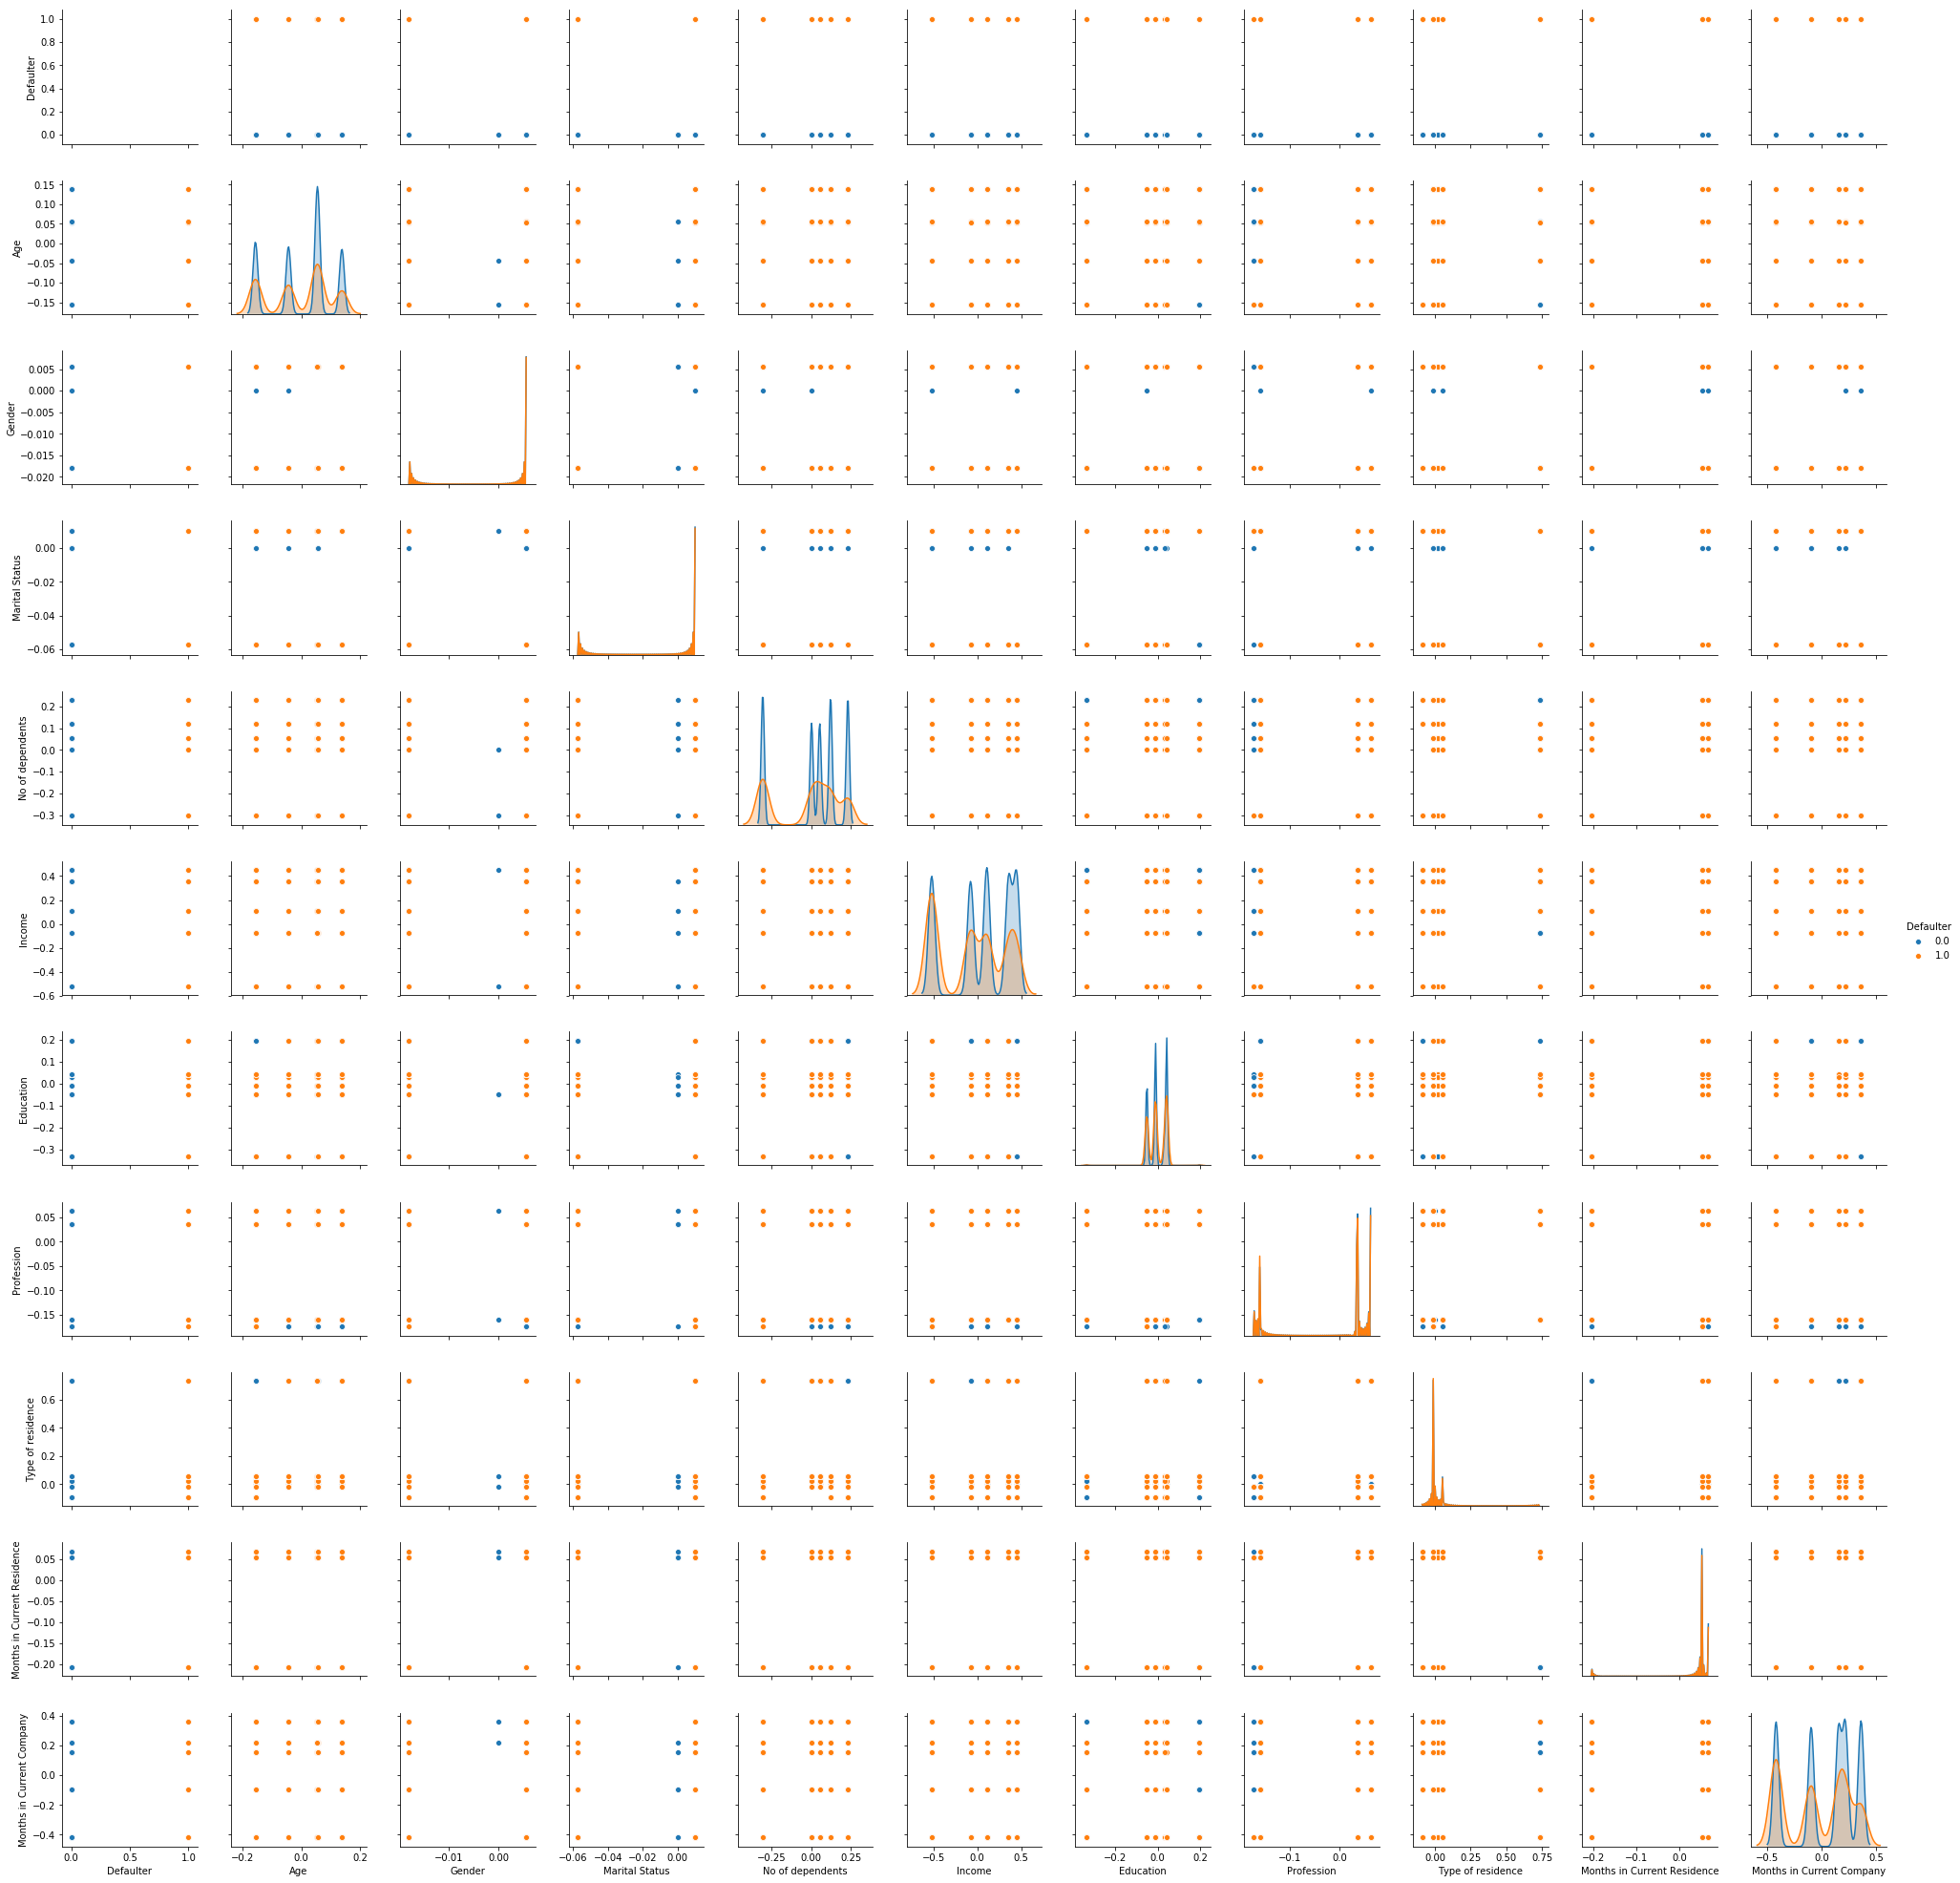

In [958]:
sns.pairplot(data=woe_demo_graph_df[demo_graph_df.columns[~demo_graph_df.columns.isin(['Application ID'])]], hue='Defaulter')
plt.show()

In [1009]:
woe_demo_graph_df.describe()

,Application ID,Defaulter,Age_WOE,Gender_WOE,Marital Status_WOE,No of dependents_WOE,Income_WOE,Education_WOE,Profession_WOE,Type of residence_WOE,Months in Current Residence_WOE,Months in Current Company_WOE
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000
mean,4.989601e+08,0.060677,0.004726,0.000014,0.000165,0.016242,0.055116,0.000716,0.003114,0.000843,0.005079,0.035289
std,2.885905e+08,0.238739,0.103242,0.009995,0.023922,0.189500,0.347854,0.040180,0.082987,0.049429,0.105491,0.279064
min,1.004500e+05,0.000000,-0.157052,-0.017962,-0.057208,-0.303632,-0.521351,-0.332641,-0.174637,-0.089872,-0.206622,-0.419121
25%,2.483719e+08,0.000000,-0.044027,0.005572,0.010140,0.003056,-0.077623,-0.009883,0.036476,-0.013719,0.053803,-0.097965
50%,4.975698e+08,0.000000,0.053963,0.005572,0.010140,0.053795,0.108156,-0.009883,0.036476,-0.013719,0.053803,0.151812
75%,7.495868e+08,0.000000,0.056103,0.005572,0.010140,0.122271,0.357093,0.042582,0.036476,-0.013719,0.053803,0.215777
max,1.000084e+09,1.000000,0.138618,0.005572,0.010140,0.230553,0.448513,0.196042,0.063614,0.731344,0.068582,0.359159


There is an issue with **Age & Income** feature variable, both should have positve values.<BR>
**Months in Current Residence** have big difference in **Mean (34.6) and Median(10)**.

**Defaulter** : Check for class imbalance 

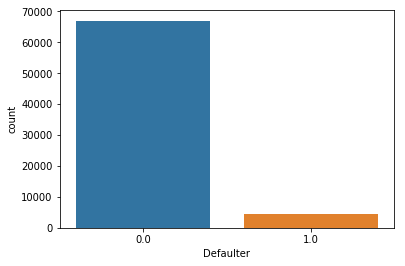

0.0    93.932253
1.0     6.067747
Name: Defaulter, dtype: float64

In [1010]:
#Data imbalance check on Target Variable
sns.countplot(data=woe_demo_graph_df, x='Defaulter')
plt.show()
woe_demo_graph_df['Defaulter'].value_counts() / woe_demo_graph_df.index.size*100

**Age**

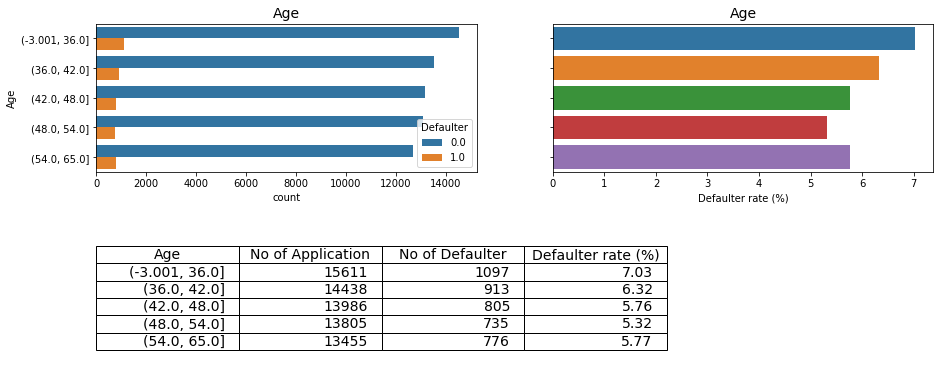

In [1011]:
PlotCategoricalFeatures(woe_demo_graph_df, 'Age')

In [ ]:
demo_graph_df[demo_graph_df['Age'] <= 10]

In [ ]:
demo_graph_df[demo_graph_df['Age'] <= 10]['Age'].value_counts()

**16** applications have 0 as age as well as **1** have negative age which is incorrect.

# TODO : AGE

**Gender**

In [ ]:
PlotCategoricalFeatures(demo_graph_df, 'Gender')

Though we have more records for **Male** than **Female**, but default rate for both categories are almost same.  

**Marital Status**

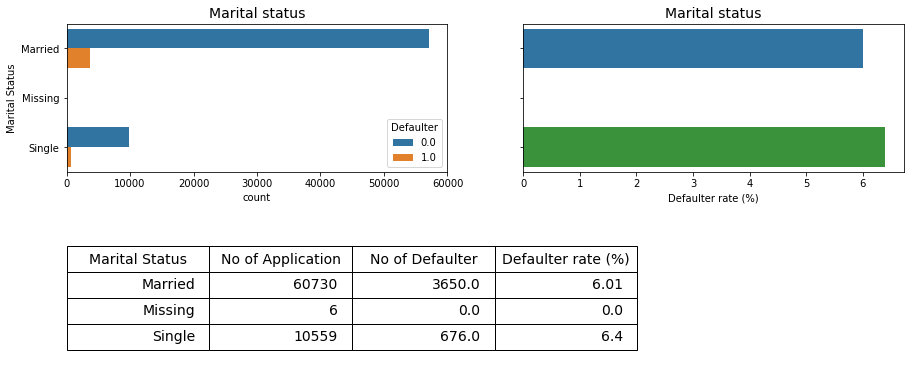

In [1012]:
PlotCategoricalFeatures(woe_demo_graph_df, 'Marital Status')

Same as gender, defaulter rate for Married & Single is same.

**No of dependents**

In [ ]:
PlotCategoricalFeatures(demo_graph_df, 'No of dependents')

**Income**

In [ ]:
PlotNumericalFeatures(demo_graph_df, 'Income')

In [ ]:
demo_graph_df[(demo_graph_df['Income'] <= 0) & (demo_graph_df['Defaulter'] == 1)]

In [ ]:
demo_graph_df[(demo_graph_df['Income'] <= 0) & (demo_graph_df['Defaulter'] == 0)]

In [ ]:
demo_graph_df[demo_graph_df['Income'] <= 0]['Income'].value_counts()

In [ ]:
demo_graph_df['Income'].describe(percentiles=[0.01,0.05,0.1])

# TODo : Income 

**Education**

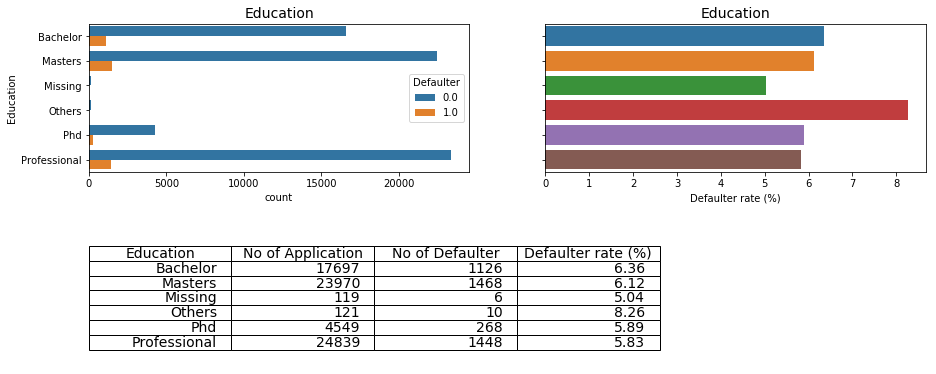

In [1013]:
PlotCategoricalFeatures(woe_demo_graph_df, 'Education')

Others category have very less records but have high defaulter rate.

**Profession**

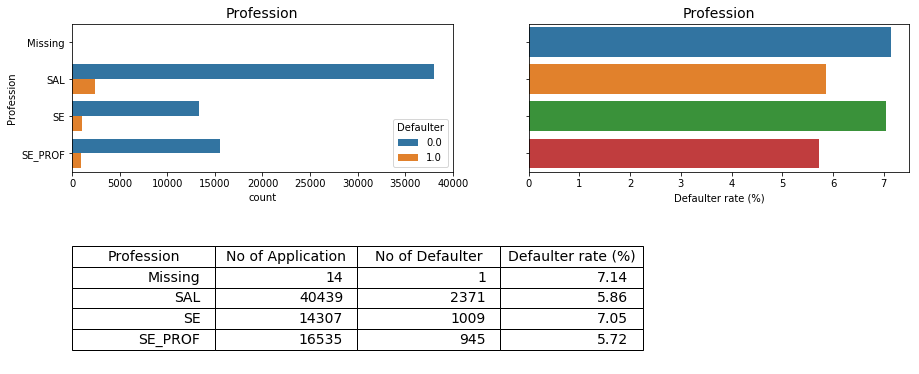

In [1014]:
PlotCategoricalFeatures(woe_demo_graph_df, 'Profession')

**Type of residence**

In [ ]:
PlotCategoricalFeatures(demo_graph_df, 'Type of residence')

**Months in Current Residence**

In [ ]:
PlotNumericalFeatures(demo_graph_df, 'Months in Current Residence')

**Months in Currrent residence** variable is highly right skewed.

In [ ]:
demo_graph_df[demo_graph_df['Months in Current Residence'] <= 0]

In [ ]:
demo_graph_df['Months in Current Residence'].describe(percentiles=np.arange(0.5,1,0.05))

# TODO : **Months in Currrent residence** variable is highly right skewed.

**Months in Current Company**

In [ ]:
PlotNumericalFeatures(demo_graph_df, 'Months in Current Company')

There are few outliers monstly in non defaulter category.<BR>


# TODO Months in Current Company

Analyze **Credit Bureau** data.

In [ ]:
credit_bureau_df[credit_bureau_df.columns[~credit_bureau_df.columns.isin(['Application ID', 'Defaulter'])]].head()

In [ ]:
credit_bureau_df.describe()

**30 DPD in 6M, 60 DPD in 6M & 90 DPD in 6M**

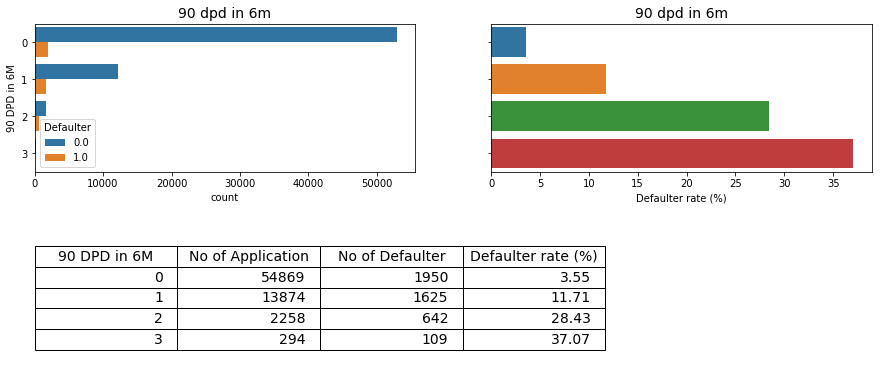

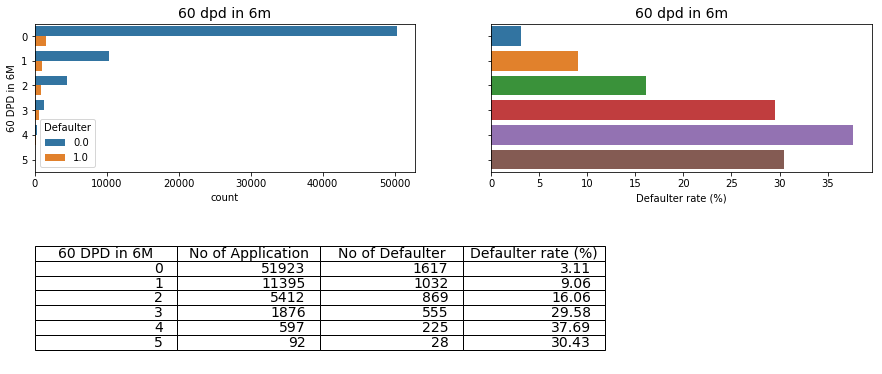

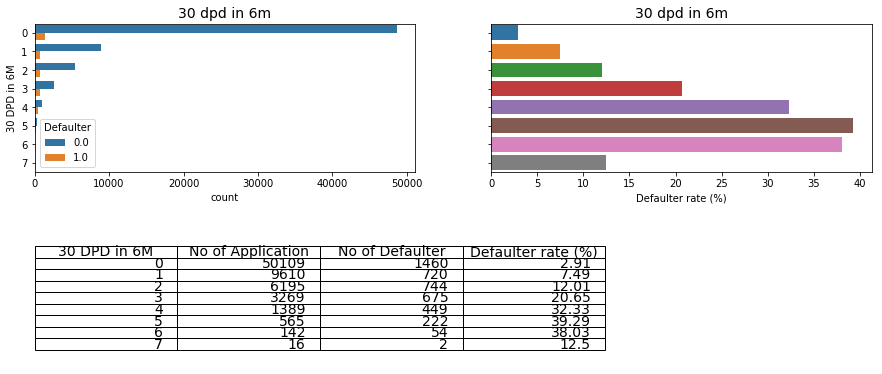

In [1015]:
PlotCategoricalFeatures(credit_bureau_df, '90 DPD in 6M')
PlotCategoricalFeatures(credit_bureau_df, '60 DPD in 6M')
PlotCategoricalFeatures(credit_bureau_df, '30 DPD in 6M')

Defaultor rate increase as number of pay due days increases.

**30 DPD in 12M, 60 DPD in 12M & 90 DPD in 12M**

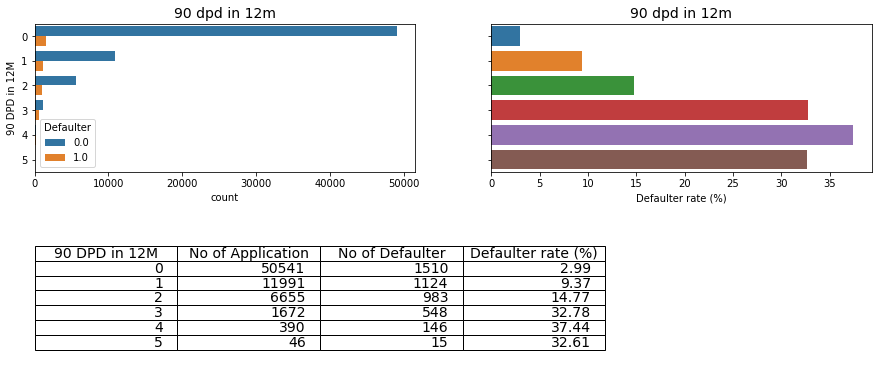

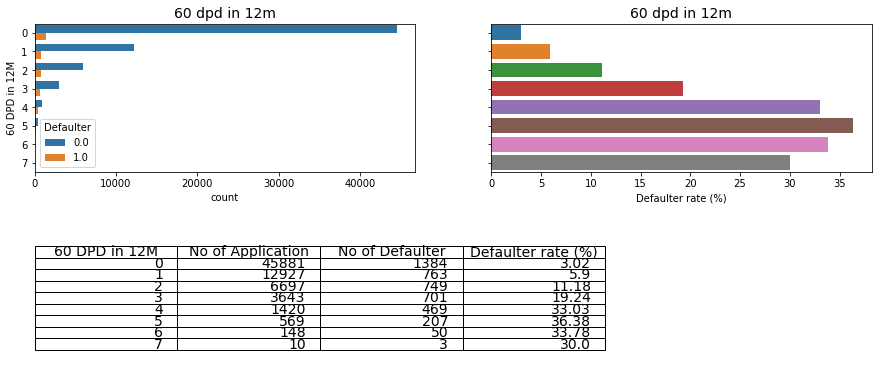

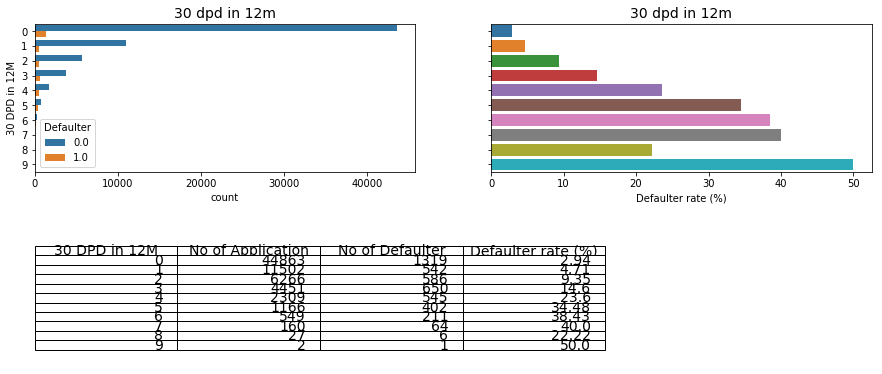

In [1016]:
PlotCategoricalFeatures(credit_bureau_df, '90 DPD in 12M')
PlotCategoricalFeatures(credit_bureau_df, '60 DPD in 12M')
PlotCategoricalFeatures(credit_bureau_df, '30 DPD in 12M')

Similare trend like 6M DPD data.<BR>
If applicant crossed 90 DPD mutiple times than there are high chance of defaultor.

**Average Credit Card Utilization in 12M**

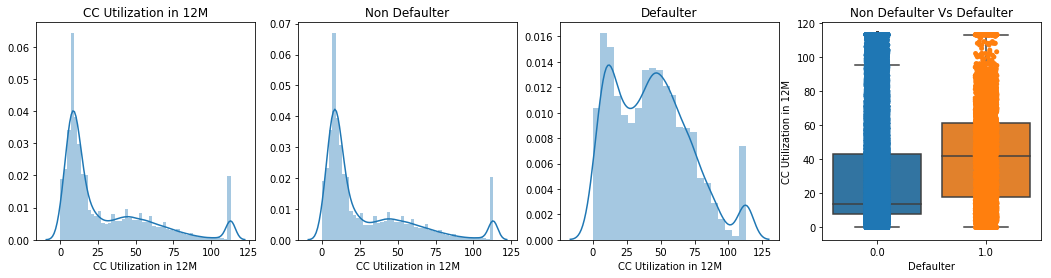

In [1017]:
PlotNumericalFeatures(credit_bureau_df, 'CC Utilization in 12M')

**Number of Trades Opened in 6M & Number of Trades Opened in 12M**

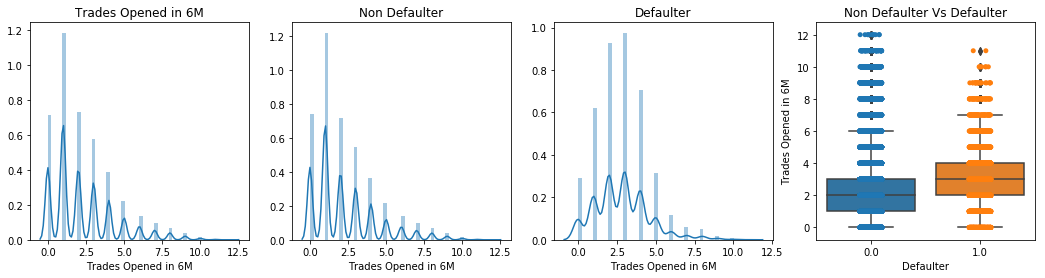

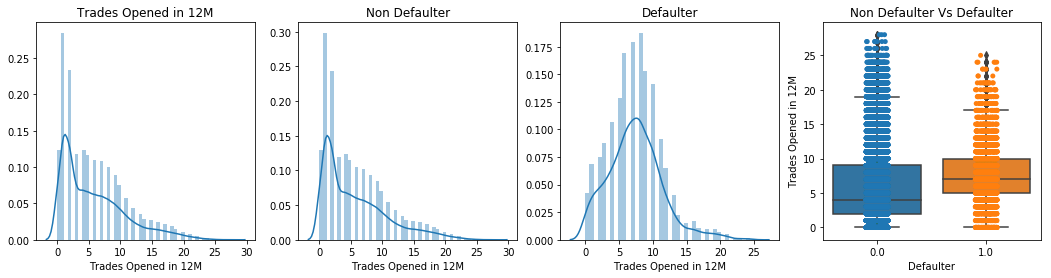

In [1018]:
PlotNumericalFeatures(credit_bureau_df, 'Trades Opened in 6M')
PlotNumericalFeatures(credit_bureau_df, 'Trades Opened in 12M')

**Number of PL Trades Opened in 6M & Number of PL Trades Opened in 12M**

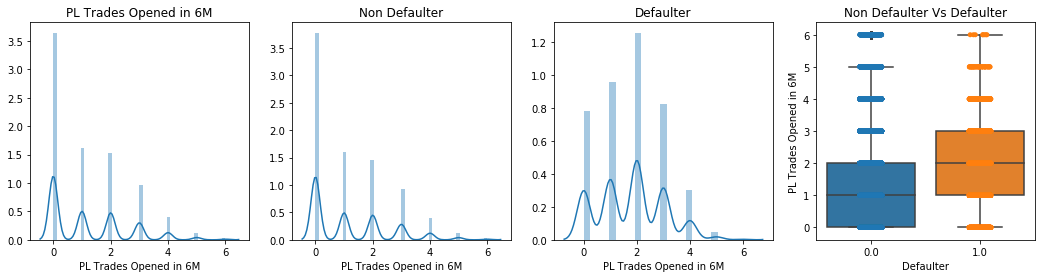

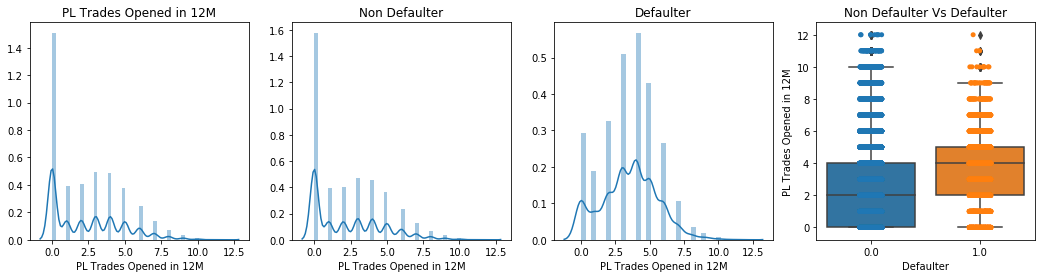

In [1019]:
PlotNumericalFeatures(credit_bureau_df, 'PL Trades Opened in 6M')
PlotNumericalFeatures(credit_bureau_df, 'PL Trades Opened in 12M')

**Number of Inquiries in 6M & Number of Inquiries in 12M**

In [ ]:
PlotNumericalFeatures(credit_bureau_df, 'Inquiries in 6M')
PlotNumericalFeatures(credit_bureau_df, 'Inquiries in 12M')

**Presence of open home loan**

In [ ]:
PlotCategoricalFeatures(credit_bureau_df, 'Presence of open home loan')

**Presence of open auto loan**

In [ ]:
PlotCategoricalFeatures(credit_bureau_df, 'Presence of open auto loan')

**Outstanding Balance**

In [ ]:
PlotNumericalFeatures(credit_bureau_df, 'Outstanding Balance')

**Total No of Trades**

In [ ]:
PlotNumericalFeatures(credit_bureau_df, 'Total No of Trades')

Merge both dataset using index (as we know there are duplicate application id).

In [ ]:
demo_graph_credit_bureau_df = pd.merge(demo_graph_df, credit_bureau_df, left_index=True, right_index=True)

In [ ]:
demo_graph_credit_bureau_df.head()

In [ ]:
demo_graph_credit_bureau_df[demo_graph_credit_bureau_df['Application ID_x'] != demo_graph_credit_bureau_df['Application ID_y'] ]

In [ ]:
demo_graph_credit_bureau_df.info()

In [ ]:
#Drop and rename columns
demo_graph_credit_bureau_df.drop(labels=['Application ID_y', 'Defaulter_y'], axis=1, inplace=True)
demo_graph_credit_bureau_df.rename(columns={'Application ID_x' : 'Application ID', 'Defaulter_x' : 'Defaulter'}, inplace=True)

Identify **Weight Of Evidance** for feature variables.

In [ ]:
demo_graph_credit_bureau_df.info()